# Esport - CS2 demo analysis

This jupyter notebook can be found here https://drive.google.com/file/d/11yr8qwfT3YO204pEjOpYRfRXDcGdGQQV/view?usp=sharing

- Demo file: https://drive.google.com/file/d/1AVZ3IdrN-TCkclVUcSEyjwrYMH58aqWe/view?usp=sharing
- Map: https://drive.google.com/file/d/1jQZULatBDxeBHUeQfj9XUgFDbwjwvKhm/view?usp=sharing

Project requirements:
<br>numpy
<br>pandas
<br>matplotlib
<br>demoparser2
<br>jupyterlab
<br>seaborn

Useful links:
- HLTV results - https://www.hltv.org/results
- CS2 events - https://cs2.poggu.me/dumped-data/game-events/
- CS2 map sizes - https://github.com/pnxenopoulos/awpy/blob/main/awpy/data/map_data.py

CS2 Parser:
- Parser - https://github.com/LaihoE/demoparser
- Documentation - https://github.com/LaihoE/demoparser/tree/main/documentation/python
- Example - https://github.com/LaihoE/demoparser/blob/main/examples/1vX/main.py
- Examples - https://github.com/LaihoE/demoparser/tree/main/examples

## Imports

In [29]:
from demoparser2 import DemoParser
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns

## Functions

In [30]:
def draw_map(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['X'], df['Y'], c='blue', marker='o', label='Player Positions')
    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('2D Map of Player Positions')
    plt.grid(True)
    plt.legend()
    plt.show()

In [51]:
def draw_movement(df_all, df_path=None, title='2D Map of Player Positions', labels='Player Positions'):
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))

    img = mpimg.imread('Cs2_mirage_radar.webp')
    # Plot the image behind the points
    plt.imshow(img, extent=[-3230, 1883, -3490, 1713], aspect='auto')  # Extent sets the image limits

    plt.scatter(df_all['X'], df_all['Y'], c='blue', marker='o', label=labels)

    if df_path is not None:
        plt.scatter(df_path['X'], df_path['Y'], color='red', linewidth=2, label='Highlighted path', marker='o')

    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)

    # Adding labels and title
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(title)

    # Display the plot
    plt.grid(True)
    plt.legend()
    plt.show()

# Data overview

In [32]:
parser = DemoParser("demos/eternal-fire-vs-natus-vincere-m2-mirage.dem")

## Events

In [33]:
df_deaths = parser.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
df_weapon_fires = parser.parse_event("weapon_fire", player=["X", "Y"], other=["total_rounds_played"])
df_player_spawns = parser.parse_event("player_spawn", other=["total_rounds_played"])
df_player_teams = parser.parse_event("player_team", other=["total_rounds_played"])
df_player_hurts = parser.parse_event("player_hurt", other=["total_rounds_played"])
df_round_starts = parser.parse_event("round_start")
df_round_ends = parser.parse_event("round_end")
df_last_round_half = parser.parse_event("round_announce_last_round_half")
df_item_purchases = parser.parse_event("item_purchase", other=["total_rounds_played"])
df_item_pickups = parser.parse_event("item_pickup", other=["total_rounds_played"])
df_bomb_plants = parser.parse_event("bomb_planted", other=["total_rounds_played"])
df_bomb_defuses = parser.parse_event("bomb_defused", other=["total_rounds_played"])
df_bomb_explosions = parser.parse_event("bomb_exploded", other=["total_rounds_played"])
df_bomb_drops = parser.parse_event("bomb_dropped", other=["total_rounds_played"])
df_bomb_pickups = parser.parse_event("bomb_pickup", other=["total_rounds_played"])
df_hegrenade_detonations = parser.parse_event("hegrenade_detonate", other=["total_rounds_played"])
df_flashbang_detonations = parser.parse_event("flashbang_detonate", other=["total_rounds_played"])
df_smokegrenade_detonations = parser.parse_event("smokegrenade_detonate", other=["total_rounds_played"])
df_smokegrenade_expirations = parser.parse_event("smokegrenade_expired", other=["total_rounds_played"])
df_inferno_startburns = parser.parse_event("inferno_startburn", other=["total_rounds_played"])
df_inferno_expirations = parser.parse_event("inferno_expire", other=["total_rounds_played"])
df_player_pings = parser.parse_event("player_ping", other=["total_rounds_played"])
df_player_sounds = parser.parse_event("player_sound", other=["total_rounds_played"])
df_ticks = parser.parse_ticks(["X", "Y"])

In [35]:
max_round = df_player_spawns["total_rounds_played"].max() + 1
max_round

np.int32(18)

Team interpretation in numbers:
- 3 = CT
- 2 = T

In [37]:
df_player_teams

,disconnect,isbot,oldteam,silent,team,tick,total_rounds_played,user_name,user_steamid
0,False,False,2,True,3,87273,12,jL,76561198176878303
1,False,False,3,True,2,87273,12,Calyx,76561198052546265
2,False,False,2,True,3,87273,12,w0nderful,76561199063068840
3,False,False,3,True,2,87273,12,Wicadia,76561198812513923
4,False,False,3,True,2,87273,12,MAJ3R,76561197967432889
5,False,False,2,True,3,87273,12,Aleksib,76561198013243326
6,False,False,3,True,2,87273,12,XANTARES,76561198044118796
7,False,False,2,True,3,87273,12,b1t,76561198246607476
8,False,False,2,True,3,87273,12,iM,76561198050250233
9,False,False,3,True,2,87273,12,woxic,76561198083485506


In [38]:
# Another approach
df_team_info2 = parser.parse_player_info();
df_team_info2

,steamid,name,team_number
0,76561198176878303,jL,3
1,76561198052546265,Calyx,2
2,76561199063068840,w0nderful,3
3,76561198812513923,Wicadia,2
4,76561197967432889,MAJ3R,2
5,76561198013243326,Aleksib,3
6,76561198044118796,XANTARES,2
7,76561198246607476,b1t,3
8,76561198050250233,iM,3
9,76561198083485506,woxic,2


In [39]:
df_deaths

,assistedflash,assister_X,assister_Y,assister_name,assister_steamid,attacker_X,attacker_Y,attacker_name,attacker_steamid,attackerblind,...,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe
0,False,NaN,NaN,None,None,296.651398,-1586.485962,Aleksib,76561198013243326,False,...,0,150.391434,-1526.738159,Wicadia,76561198812513923,glock,17293822569165815812,20660576547,,0
1,False,NaN,NaN,None,None,-452.761658,-1758.071045,Aleksib,76561198013243326,False,...,0,-531.607178,-2378.742432,XANTARES,76561198044118796,glock,17293822569165815812,20660576547,,0
2,False,-531.607178,-2378.742432,XANTARES,76561198044118796,-1570.978027,-760.632751,MAJ3R,76561197967432889,False,...,0,-1272.865112,-1050.418091,iM,76561198050250233,usp_silencer,17293822569145761853,13626608964,,0
3,False,NaN,NaN,None,None,-812.001831,-2082.587646,w0nderful,76561199063068840,False,...,0,-465.970337,-2350.779785,Calyx,76561198052546265,glock,17293822569105195012,34398553971,,0
4,False,NaN,NaN,None,None,NaN,NaN,None,None,False,...,0,-1693.296631,-1375.607422,Aleksib,76561198013243326,planted_c4,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,NaN,NaN,None,None,-1698.991211,682.782166,jL,76561198176878303,False,...,17,-1064.924072,151.871338,XANTARES,76561198044118796,m4a1_silencer,17293822569131868220,34241486015,,0
121,False,-2065.616211,-559.346924,iM,76561198050250233,-1699.885620,681.705627,jL,76561198176878303,False,...,17,-1210.908081,285.837585,MAJ3R,76561197967432889,m4a1_silencer,17293822569131868220,34241486015,,0
122,False,-1064.924072,151.871338,XANTARES,76561198044118796,-1022.358459,120.646042,woxic,76561198083485506,False,...,17,-1699.831299,683.073303,jL,76561198176878303,ak47,17293822569170534407,25065970543,,0
123,False,-1699.792603,683.121765,jL,76561198176878303,-2495.580322,328.931458,Aleksib,76561198013243326,False,...,17,-1021.273499,123.897125,woxic,76561198083485506,deagle,17293822569105129473,29398974889,,0


In [40]:
df_deaths.keys()

Index(['assistedflash', 'assister_X', 'assister_Y', 'assister_name',
       'assister_steamid', 'attacker_X', 'attacker_Y', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'attackerinair', 'distance',
       'dmg_armor', 'dmg_health', 'dominated', 'headshot', 'hitgroup',
       'noreplay', 'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick',
       'total_rounds_played', 'user_X', 'user_Y', 'user_name', 'user_steamid',
       'weapon', 'weapon_fauxitemid', 'weapon_itemid',
       'weapon_originalowner_xuid', 'wipe'],
      dtype='object')

## Movements

In [ ]:
df_movements = parser.parse_ticks(["X", "Y", "team_rounds_total", "team_name", "is_alive", "total_rounds_played"])
df_movements

Rename "TERRORIST" into "T" to match the naming.

In [ ]:
df_movements.loc[:, "team_name"] = df_movements["team_name"].replace("TERRORIST", "T")
df_movements

In [ ]:
draw_movement(df_movements)

### Player "Calyx" movements

All selected movements for a specific player with name Calyx.

In [ ]:
df_calyx_movement = df_movements[(df_movements["name"] == "Calyx")]
df_calyx_movement

Selected movements for the first round only.

In [ ]:
df_calyx_movement_round1 = df_calyx_movement[(df_calyx_movement["total_rounds_played"]) == 0]
df_calyx_movement_round1

#### First round movement

In [ ]:
draw_movement(df_calyx_movement_round1)

Filter all movement for comparison to make calculation faster.

In [ ]:
df_movements_filtered = df_movements[::5]
df_movements_filtered

In [ ]:
print(f"df_movements:\t\t{df_movements.size}\ndf_movements_filtered:\t {df_movements_filtered.size}")

In [ ]:
draw_movement(df_movements_filtered, df_calyx_movement_round1)

#### All movements as a CT

All movements for player named Calyx in the CT team.

In [ ]:
draw_movement(df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

Comparison of Calyx movements in the CT team with all movements.

In [ ]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

#### All movements as a T

All movements for player named Calyx in the T team.

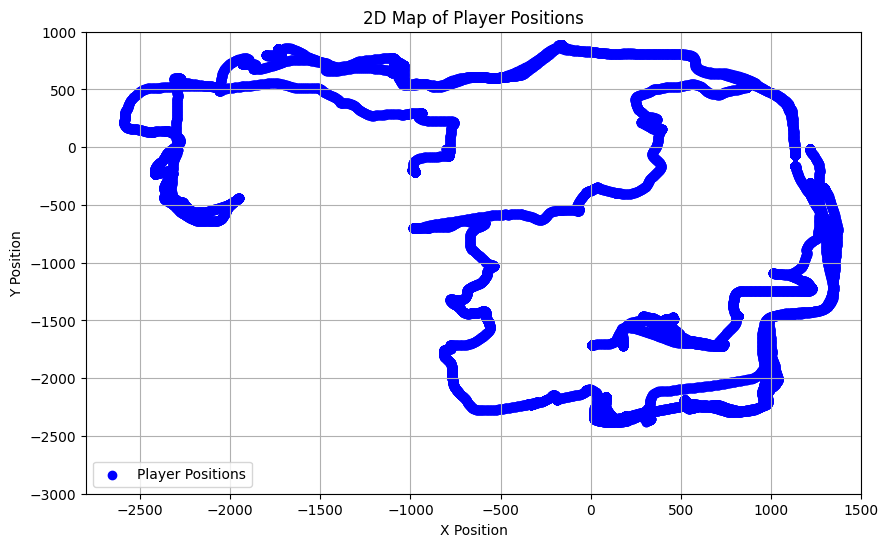

In [42]:
draw_map(df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

Comparison of Calyx movements in the T team with all movements.

<Figure size 1000x600 with 0 Axes>

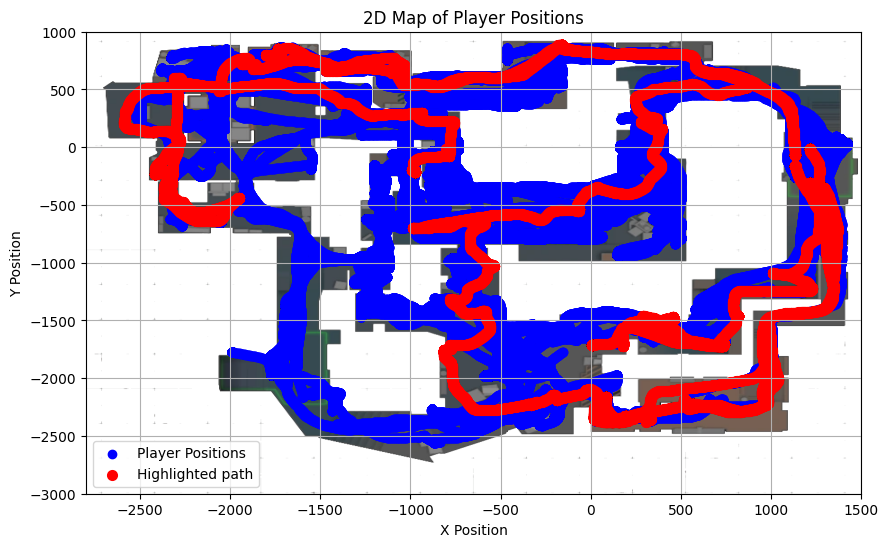

In [43]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

## Purchases

Data overview of purchase event table for all game rounds.

In [ ]:
df_item_purchases

### All rounds purchases

Total number of purchases for each item.

In [ ]:
item_name_counts_df = df_item_purchases.groupby('item_name').size().reset_index(name='count')
item_name_counts_df

Plotting the chart of purchases for each weapon using pure matplotlib.

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(item_name_counts_df['item_name'], item_name_counts_df['count'], color='skyblue')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Using seaborn package to plot the chart instead.

In [ ]:
# Plotting with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='item_name', y='count', data=item_name_counts_df, hue='item_name', palette='viridis')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Grouped item purchases for each player

In [ ]:
# Group by 'name' and 'item_name' to get the count of each item per player
item_name_per_player = df_item_purchases.groupby(['name', 'item_name']).size().reset_index(name='count')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='name', y='count', hue='item_name', data=item_name_per_player)

# Adding labels and title
plt.xlabel('Player Name')
plt.ylabel('Item Count')
plt.title('Count of Each Item Name per Player')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Task 1

Choose and analyse **four** situation that you find interesting and can be used as an information used to improve players' knowledge.

Here are some examples:
- Identifying most frequent weapon used - determine the most frequently fired weapon by each player across the demo
- Tracking player deaths over time - track the number of deaths for each player across the rounds
- Finding players with highest damage taken - identify players who took the most damage in the demo
- Bomb events analysis - track bomb planting and defusing events over rounds
- Flashbang and HE grenade effectiveness - measure the effectiveness of flashbangs and HE grenades by their usage and detonations
- Team composition over time - track how player teams changed over the course of the game

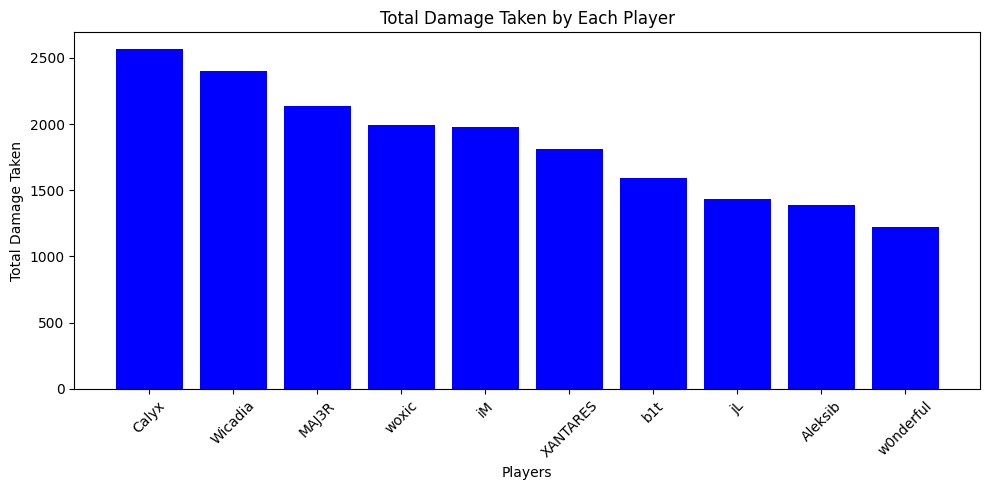

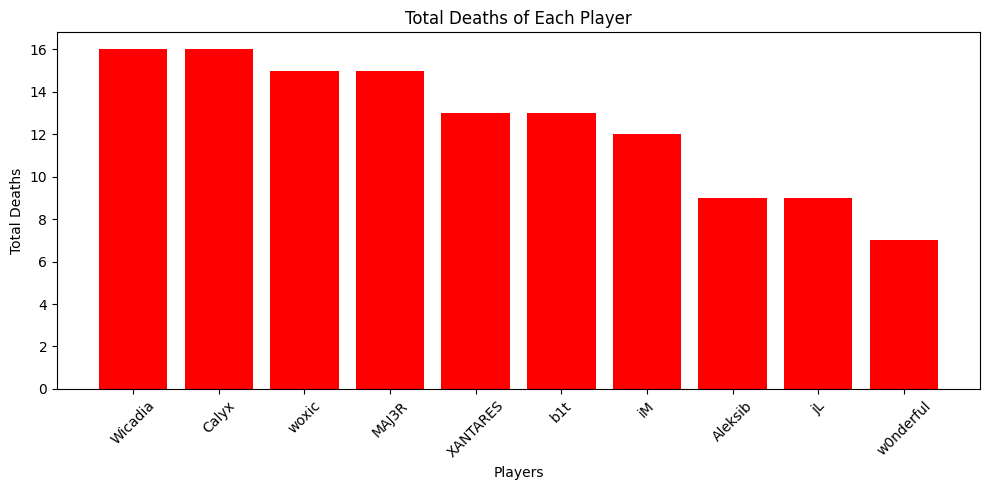

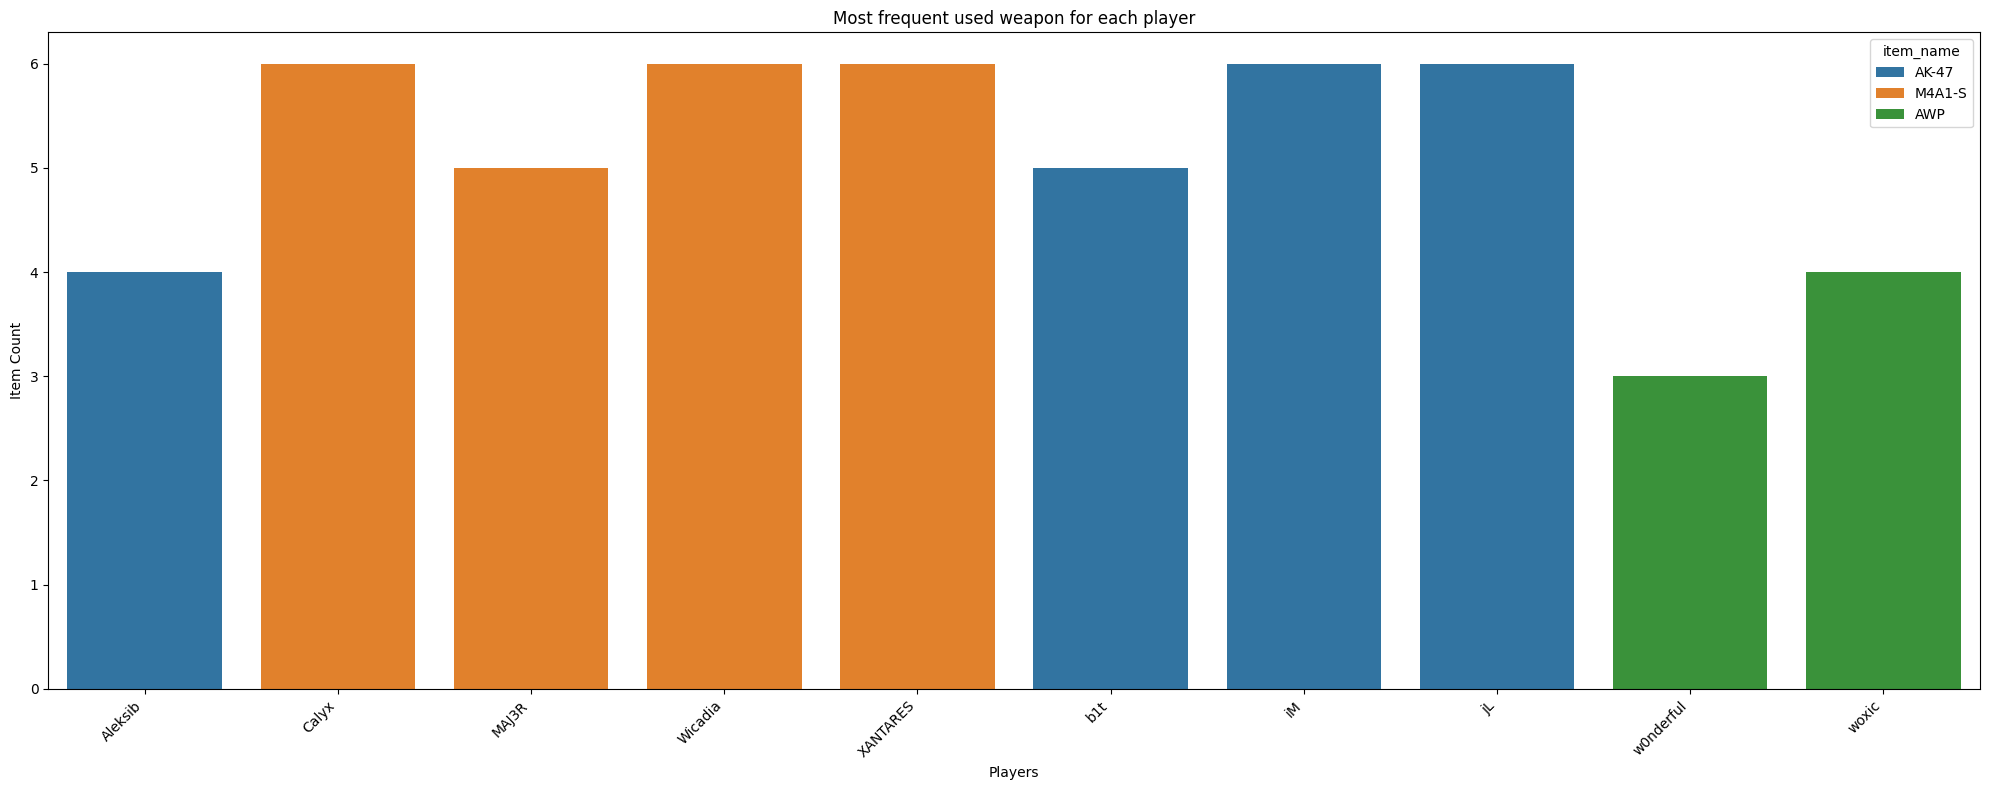

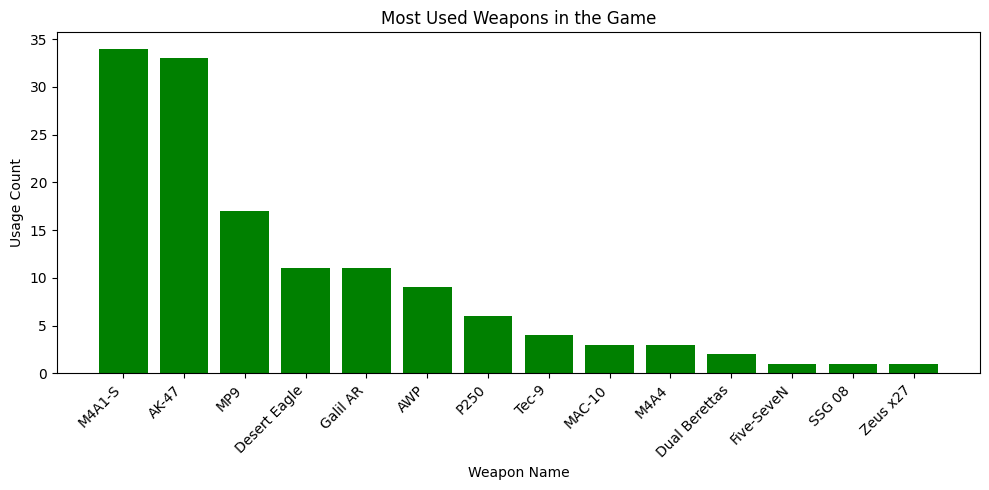

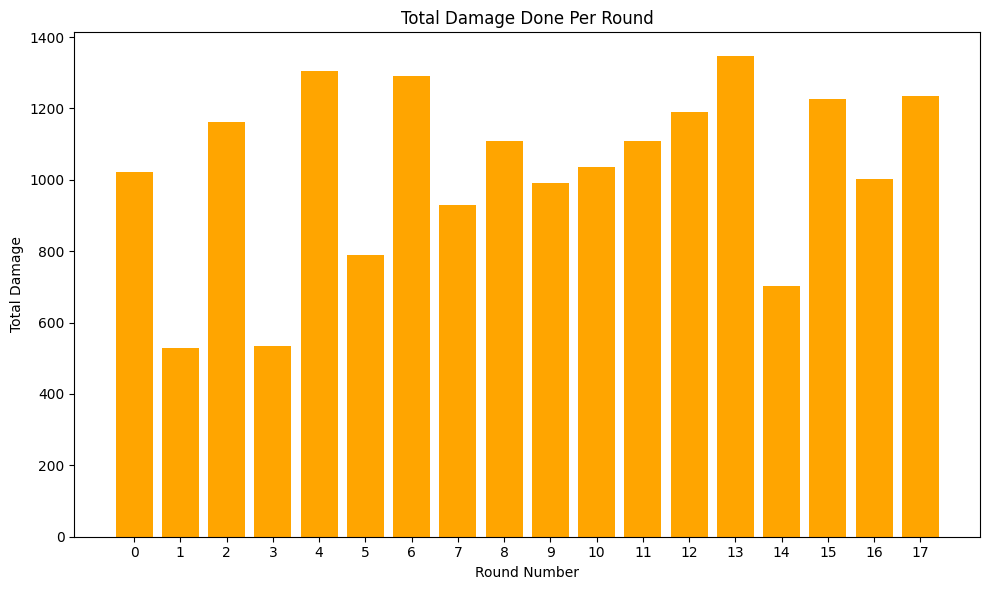

<Figure size 1000x600 with 0 Axes>

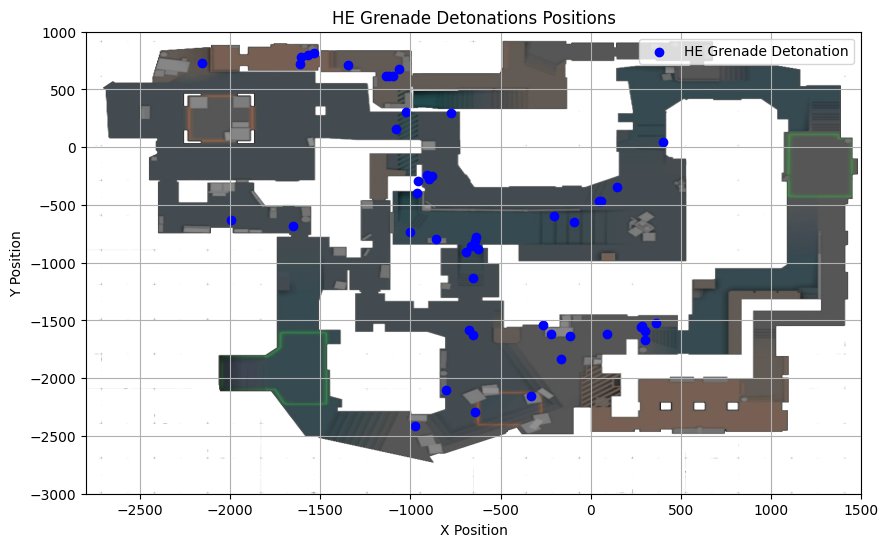

<Figure size 1000x600 with 0 Axes>

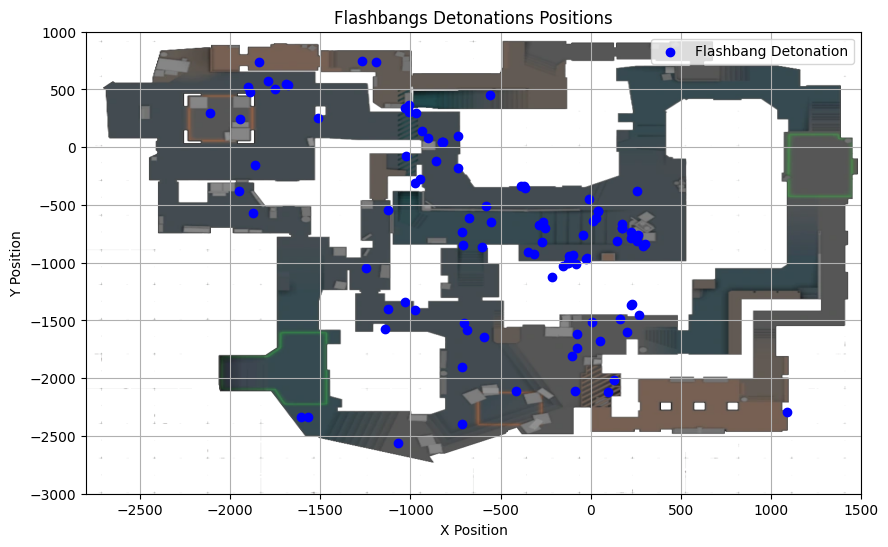

In [53]:
# Prvně zjistíme jaká jména se ve hře vyskytují
unique_names = list(set(df_player_hurts["user_name"]))

# Inicializace listů, které budeme používat
player_dmg_list = []
player_deaths_list = []

# Projdeme si každé jméno z listu jmén, které jsme získali 
for player_name in unique_names:
    # Zjistíme kolik dmg dostal hráč, který se jmenuje dle proměnné player_name
    dmg_taken = list(df_player_hurts[(df_player_hurts["user_name"] == player_name)]["dmg_health"])

    # Zároveň zjistíme kolik smrtí má daný hráč
    player_deaths = len(list(df_deaths[(df_deaths["user_name"] == player_name)]["user_name"]))

    # Přidáme data o smrtích do listu v podobě tuple ("jméno hráče", "počet smrtí")
    player_deaths_list.append((player_name, player_deaths))

    # Sečteme hodnoty z listu dmg_taken, abychom zjistili kolik dmg bylo danému hráči dáno
    total_dmg_taken = sum(dmg_taken)

    # Následně přidáme data ohledně dmg do listu, které jsou taktéž v podobě tuple
    player_dmg_list.append((player_name, total_dmg_taken))

# Seřazení podle total_dmg_taken sestupně
player_dmg_list_sorted = sorted(player_dmg_list, key=lambda x: x[1], reverse=True)

# Seřazení podle total_dmg_taken sestupně
player_deaths_list_sorted = sorted(player_deaths_list, key=lambda x: x[1], reverse=True)

# Oddělení hráčů a hodnot pro dmg a smrti pro následující grafy
players_dmg = [x[0] for x in player_dmg_list_sorted]
dmg_values = [x[1] for x in player_dmg_list_sorted]

players_deaths = [x[0] for x in player_deaths_list_sorted]
deaths_values = [x[1] for x in player_deaths_list_sorted]

# Graf pro celkový dmg
plt.figure(figsize=(10, 5))
plt.bar(players_dmg, dmg_values, color='blue')
plt.title('Total Damage Taken by Each Player')
plt.xlabel('Players')
plt.ylabel('Total Damage Taken')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf pro počet smrtí jednotlivých hráčů
plt.figure(figsize=(10, 5))
plt.bar(players_deaths, deaths_values, color='red')
plt.title('Total Deaths of Each Player')
plt.xlabel('Players')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filtrování položek, které neobsahují slova "Grenade", "Flashbang" nebo "item"
filtered_df = df_item_purchases[~df_item_purchases['item_name'].str.contains('Grenade|Flashbang|item|Molotov', case=False, regex=True)]

# Seskupení podle jména hráče a jména zbraně, následně spočítání počtu
item_name_per_player = filtered_df.groupby(['name', 'item_name']).size().reset_index(name='count')

# Pro každého hráče najít zbraň s největším počtem použití
most_used_weapon_per_player = item_name_per_player.loc[item_name_per_player.groupby('name')['count'].idxmax()]

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='name', y='count', hue='item_name', data=most_used_weapon_per_player)

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('Item Count')
plt.title('Most frequent used weapon for each player')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Seskupení podle jména zbraně a spočítání počtu použití
weapon_usage_overall = filtered_df.groupby('item_name').size().reset_index(name='count')

# Seřazení zbraní podle počtu použití sestupně
weapon_usage_overall_sorted = weapon_usage_overall.sort_values(by='count', ascending=False)

# Graf pro nejvíce používané zbraně
plt.figure(figsize=(10, 5))
plt.bar(weapon_usage_overall_sorted['item_name'], weapon_usage_overall_sorted['count'], color='green')
plt.title('Most Used Weapons in the Game')
plt.xlabel('Weapon Name')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df_dmg_per_round = df_player_hurts.groupby('total_rounds_played')['dmg_health'].sum().reset_index(name='total_dmg_per_round')

# Vytvoření grafu
plt.figure(figsize=(10, 6))
plt.bar(df_dmg_per_round['total_rounds_played'], df_dmg_per_round['total_dmg_per_round'], color='orange')

# Přidání názvů os a titulku grafu
plt.xlabel('Round Number')
plt.ylabel('Total Damage')
plt.title('Total Damage Done Per Round')

# Nastavení hodnot na ose X (pro zajištění, že každé kolo bude na ose X)
plt.xticks(df_dmg_per_round['total_rounds_played'])

# Zobrazení grafu
plt.tight_layout()
plt.show()

# Přejmenování sloupců 'x' na 'X' a 'y' na 'Y'
df_hegrenade_detonations = df_hegrenade_detonations.rename(columns={'x': 'X', 'y': 'Y'})

# Ověření změn
draw_movement(df_hegrenade_detonations, title='HE Grenade Detonations Positions', labels='HE Grenade Detonation')

# Přejmenování sloupců 'x' na 'X' a 'y' na 'Y'
df_flashbang_detonations = df_flashbang_detonations.rename(columns={'x': 'X', 'y': 'Y'})

# Ověření změn
draw_movement(df_flashbang_detonations, title='Flashbangs Detonations Positions', labels='Flashbang Detonation')

